# H100 Bitcoin Data Analysis

This notebook analyzes H100's Bitcoin holdings and creates a log-log chart plotting Bitcoin holdings vs **BTC per diluted share** with fitted power law function.

In [15]:
# Import required libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Enable inline plotting
%matplotlib inline

# Set plot style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [16]:
# Load H100 data
print("Loading H100 Bitcoin data...")
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract historical data
hist_data = data['historicalData']
df = pd.DataFrame({
    'date': hist_data['dates'],
    'btc_balance': hist_data['btc_balance'],
    'btc_per_share': hist_data['btc_per_share'],
    'btc_per_diluted_share': hist_data['btc_per_diluted_share'],
    'diluted_shares_outstanding': hist_data['diluted_shares_outstanding']
})

print(f"Loaded {len(df)} records from {df['date'].min()} to {df['date'].max()}")
df.head()

Loading H100 Bitcoin data...
Loaded 66 records from 2025-05-22 to 2025-07-26


,date,btc_balance,btc_per_share,btc_per_diluted_share,diluted_shares_outstanding
0,2025-05-22,4.39,3.749285e-08,3.749285e-08,117089006.0
1,2025-05-23,4.39,3.749285e-08,3.749285e-08,117089006.0
2,2025-05-24,4.39,3.749285e-08,3.749285e-08,117089006.0
3,2025-05-25,4.39,3.749285e-08,3.749285e-08,117089006.0
4,2025-05-26,4.39,3.749285e-08,3.749285e-08,117089006.0


In [17]:
# Data overview
print("H100 BITCOIN DATA OVERVIEW")
print("=" * 50)
print(f"Records: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Bitcoin Balance: {df['btc_balance'].min():.2f} - {df['btc_balance'].max():.2f} BTC")
print(f"BTC per Diluted Share: {df['btc_per_diluted_share'].min():.8f} - {df['btc_per_diluted_share'].max():.8f}")

# Basic statistics
print("\nBasic Statistics:")
print(df[['btc_balance', 'btc_per_diluted_share']].describe())

H100 BITCOIN DATA OVERVIEW
Records: 66
Date range: 2025-05-22 to 2025-07-26
Bitcoin Balance: 4.39 - 628.22 BTC
BTC per Diluted Share: 0.00000004 - 0.00000192

Basic Statistics:
       btc_balance  btc_per_diluted_share
count    66.000000           6.600000e+01
mean    187.421818           6.518997e-07
std     177.328835           5.467457e-07
min       4.390000           3.749285e-08
25%      13.950000           6.635573e-08
50%     169.200000           6.892966e-07
75%     294.500000           9.742313e-07
max     628.220000           1.915375e-06


Creating Log-Log Chart with Fitted Power Law Function
Valid data points for log transformation: 66


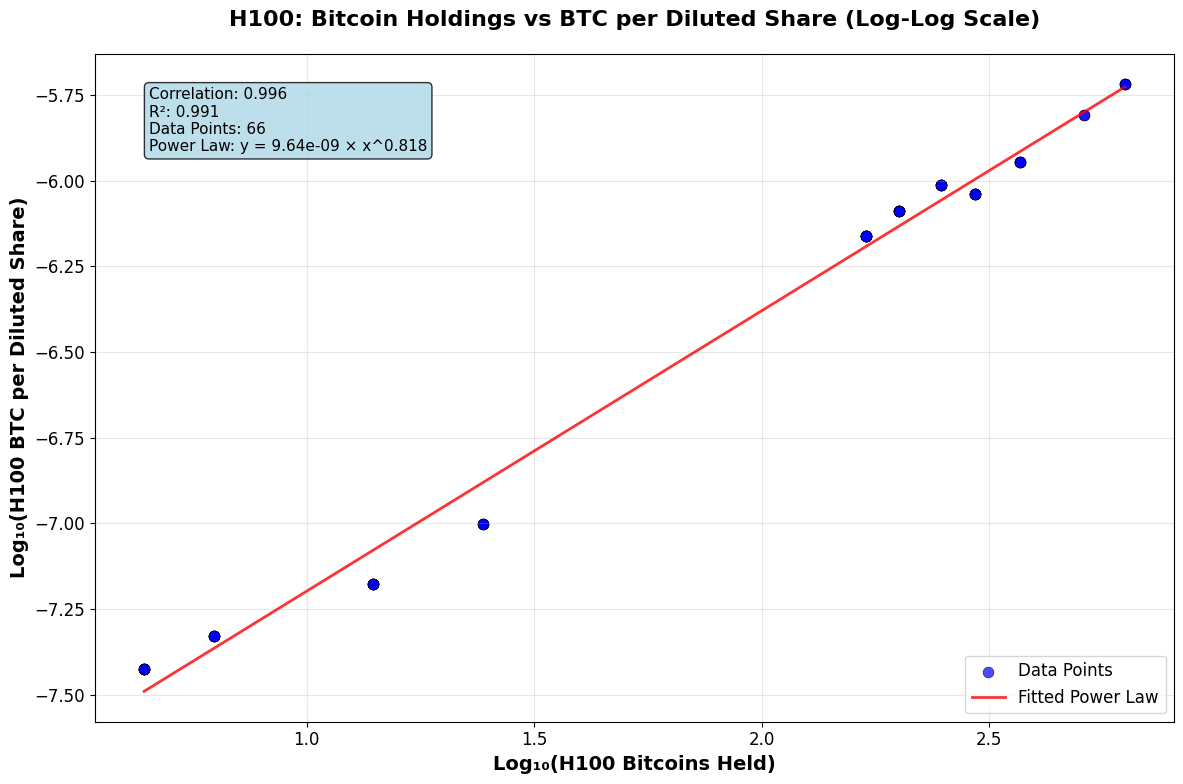


Fitted Power Law: Power Law: y = 9.64e-09 × x^0.818
Correlation coefficient: 0.996
R² Score: 0.991


In [18]:
# Create the main log-log chart with fitted function
print("Creating Log-Log Chart with Fitted Power Law Function")
print("=" * 60)

# Filter valid data for log transformation (remove zeros/negatives)
valid_data = df[(df['btc_balance'] > 0) & (df['btc_per_diluted_share'] > 0)]
print(f"Valid data points for log transformation: {len(valid_data)}")

# Calculate log10 values
log_btc_balance = np.log10(valid_data['btc_balance'])
log_btc_per_diluted_share = np.log10(valid_data['btc_per_diluted_share'])

# Fit linear regression on log-log data (represents power law)
X = log_btc_balance.values.reshape(-1, 1)
y = log_btc_per_diluted_share.values

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(log_btc_balance, log_btc_per_diluted_share, 
           alpha=0.7, s=60, c='blue', edgecolors='black', linewidth=0.5, label='Data Points')

# Plot fitted line
sort_idx = np.argsort(log_btc_balance)
plt.plot(log_btc_balance.iloc[sort_idx], y_pred[sort_idx], 
         'r-', linewidth=2, label='Fitted Power Law', alpha=0.8)

# Labels and title
plt.xlabel('Log₁₀(H100 Bitcoins Held)', fontsize=14, fontweight='bold')
plt.ylabel('Log₁₀(H100 BTC per Diluted Share)', fontsize=14, fontweight='bold')
plt.title('H100: Bitcoin Holdings vs BTC per Diluted Share (Log-Log Scale)', 
         fontsize=16, fontweight='bold', pad=20)

# Calculate correlation and power law equation
correlation = np.corrcoef(log_btc_balance, log_btc_per_diluted_share)[0, 1]
slope = reg.coef_[0]
intercept = reg.intercept_
a_coeff = 10**intercept

equation_text = f'Power Law: y = {a_coeff:.2e} × x^{slope:.3f}'

# Display statistics
stats_text = f'Correlation: {correlation:.3f}\nR²: {r2:.3f}\nData Points: {len(valid_data)}\n{equation_text}'
plt.text(0.05, 0.95, stats_text, 
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
         verticalalignment='top')

# Add legend and grid
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFitted Power Law: {equation_text}")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R² Score: {r2:.3f}")

In [19]:
# Interpretation of the Power Law
print("POWER LAW INTERPRETATION")
print("=" * 40)
print(f"The fitted equation: y = {a_coeff:.2e} × x^{slope:.3f}")
print(f"")
print(f"This means:")
print(f"• For every 1% increase in Bitcoin holdings, BTC per diluted share increases by {slope:.1f}%")
print(f"• The exponent {slope:.3f} indicates {'sub-linear' if slope < 1 else 'super-linear' if slope > 1 else 'linear'} scaling")
print(f"• R² = {r2:.3f} means the power law explains {r2*100:.1f}% of the variance")

if slope < 1:
    print(f"• Sub-linear scaling suggests diminishing returns as Bitcoin holdings increase")
elif slope > 1:
    print(f"• Super-linear scaling suggests accelerating returns as Bitcoin holdings increase")
else:
    print(f"• Linear scaling suggests proportional relationship")

POWER LAW INTERPRETATION
The fitted equation: y = 9.64e-09 × x^0.818

This means:
• For every 1% increase in Bitcoin holdings, BTC per diluted share increases by 0.8%
• The exponent 0.818 indicates sub-linear scaling
• R² = 0.991 means the power law explains 99.1% of the variance
• Sub-linear scaling suggests diminishing returns as Bitcoin holdings increase


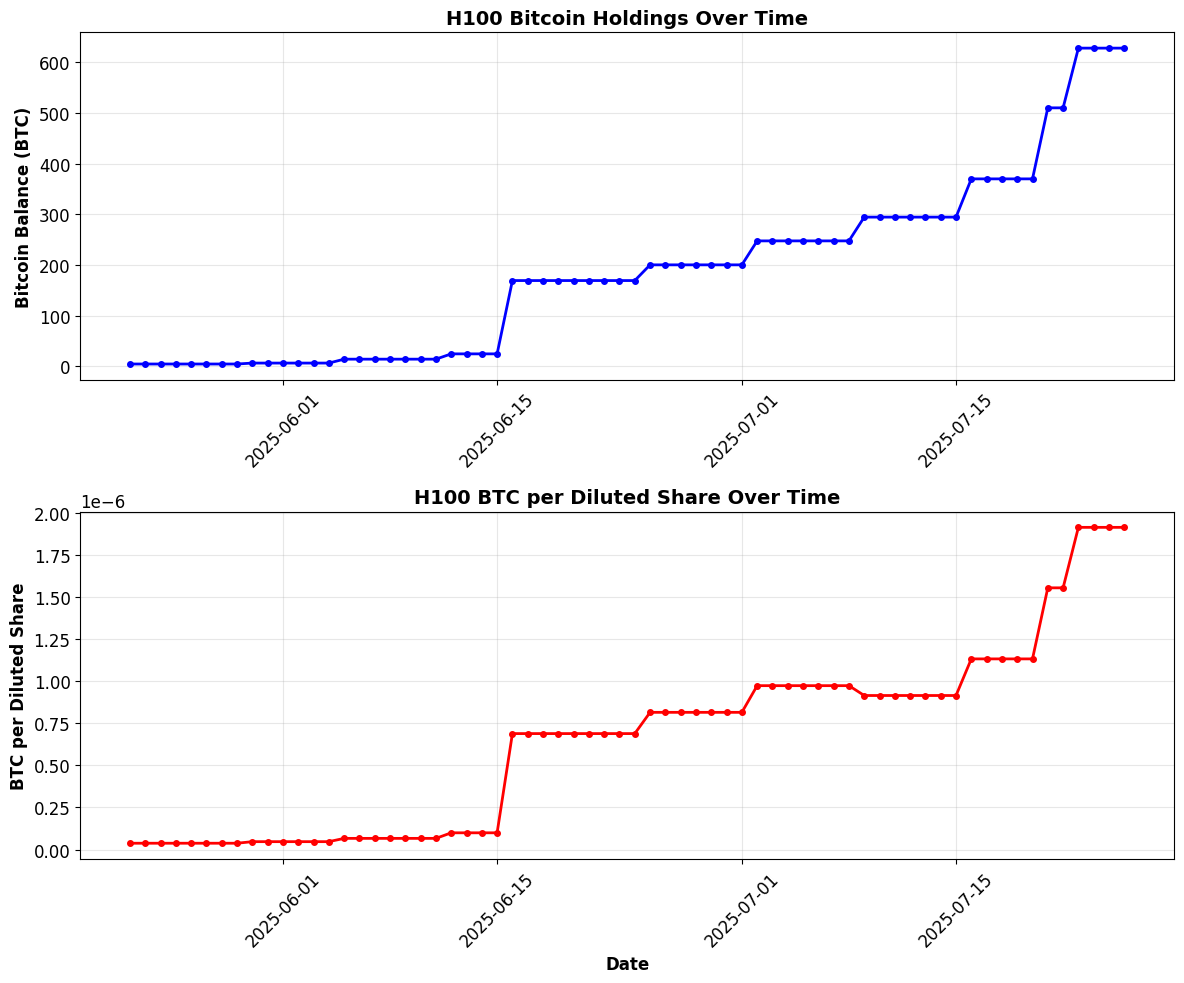

In [20]:
# Additional analysis: Time series view
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Convert dates to datetime for better plotting
df['date_dt'] = pd.to_datetime(df['date'])

# Plot Bitcoin balance over time
ax1.plot(df['date_dt'], df['btc_balance'], 'b-', linewidth=2, marker='o', markersize=4)
ax1.set_ylabel('Bitcoin Balance (BTC)', fontsize=12, fontweight='bold')
ax1.set_title('H100 Bitcoin Holdings Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot BTC per diluted share over time
ax2.plot(df['date_dt'], df['btc_per_diluted_share'], 'r-', linewidth=2, marker='o', markersize=4)
ax2.set_ylabel('BTC per Diluted Share', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_title('H100 BTC per Diluted Share Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Key insights and summary
print("KEY INSIGHTS FROM H100 BITCOIN ANALYSIS")
print("=" * 50)
print(f"• Extremely strong correlation ({correlation:.3f}) between Bitcoin holdings and BTC per diluted share")
print(f"• Power law relationship: y = {a_coeff:.2e} × x^{slope:.3f}")
print(f"• R² = {r2:.3f} indicates excellent model fit")
print(f"• Data spans {len(df)} time points from {df['date'].min()} to {df['date'].max()}")
print(f"• Bitcoin holdings increased from {df['btc_balance'].min():.2f} to {df['btc_balance'].max():.2f} BTC")
print(f"• BTC per diluted share increased from {df['btc_per_diluted_share'].min():.8f} to {df['btc_per_diluted_share'].max():.8f}")

# Calculate growth rates
btc_growth = ((df['btc_balance'].max() - df['btc_balance'].min()) / df['btc_balance'].min()) * 100
diluted_share_growth = ((df['btc_per_diluted_share'].max() - df['btc_per_diluted_share'].min()) / df['btc_per_diluted_share'].min()) * 100

print(f"\nGROWTH ANALYSIS:")
print(f"• Bitcoin holdings grew by {btc_growth:.1f}% over the period")
print(f"• BTC per diluted share grew by {diluted_share_growth:.1f}% over the period")

print(f"\nPOWER LAW IMPLICATIONS:")
print(f"• The exponent {slope:.3f} < 1 indicates diminishing returns")
print(f"• Each additional Bitcoin provides slightly less per-share value than the previous")
print(f"• This could be due to market efficiency or operational scaling effects")

print("\n✅ Analysis complete! The fitted power law reveals the precise mathematical")
print("   relationship between H100's Bitcoin accumulation and diluted shareholder value.")

KEY INSIGHTS FROM H100 BITCOIN ANALYSIS
• Extremely strong correlation (0.996) between Bitcoin holdings and BTC per diluted share
• Power law relationship: y = 9.64e-09 × x^0.818
• R² = 0.991 indicates excellent model fit
• Data spans 66 time points from 2025-05-22 to 2025-07-26
• Bitcoin holdings increased from 4.39 to 628.22 BTC
• BTC per diluted share increased from 0.00000004 to 0.00000192

GROWTH ANALYSIS:
• Bitcoin holdings grew by 14210.3% over the period
• BTC per diluted share grew by 5008.6% over the period

POWER LAW IMPLICATIONS:
• The exponent 0.818 < 1 indicates diminishing returns
• Each additional Bitcoin provides slightly less per-share value than the previous
• This could be due to market efficiency or operational scaling effects

✅ Analysis complete! The fitted power law reveals the precise mathematical
   relationship between H100's Bitcoin accumulation and diluted shareholder value.
